In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

Currently, the dataset contains a single file which represents 88588 sensor data samples collected from accelerometer and gyroscope from iPhone 5c in 10 seconds interval and ~5.4/second frequency. This data is represented by following columns (each column contains sensor data for one of the sensor's axes):

acceleration_x

acceleration_y

acceleration_z

gyro_x

gyro_y

gyro_z

There is an activity type represented by "activity" column which acts as label and reflects following activities:

"0": walking

"1": running

Apart of that, the dataset contains "wrist" column which represents the wrist where the device was placed to collect a sample on:

"0": left wrist

"1": right wrist

Additionally, the dataset contains "date", "time" and "username" columns which provide information about the exact date, time and user which collected these measurements. (modifié) 

In [ ]:
list_of_files = []

for root, dirs, files in os.walk("."):
    for file in files:
        if os.path.splitext(file)[1]==".csv":
            list_of_files.append(os.path.join(root,file))

first_data = pd.read_csv(list_of_files[0])
dataset_columns = first_data.columns
dataset_columns,list_of_files

(Index(['Timestamp', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z',
        'Activity'],
       dtype='object'),
 ['.\\data_2023-01-07_10-53-59.csv',
  '.\\data_2023-01-07_10-55-23.csv',
  '.\\data_2023-01-07_10-58-50.csv',
  '.\\data_2023-01-07_11-00-30.csv',
  '.\\data_2023-01-07_11-06-08.csv',
  '.\\data_2023-01-07_11-08-29.csv',
  '.\\data_concate.csv'])

In [ ]:
df_run = pd.read_csv("data_2023-01-07_11-06-08.csv")
df_walk = pd.read_csv("data_2023-01-07_10-55-23.csv")

3.08

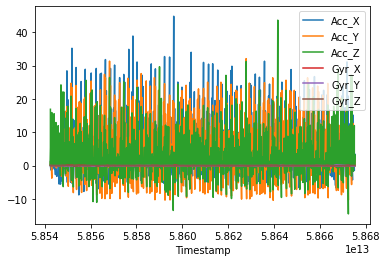

In [ ]:
df_run.plot(x="Timestamp",y=dataset_columns[1:-1])
round(np.mean(df_run["Acc_X"]),2)

0.08

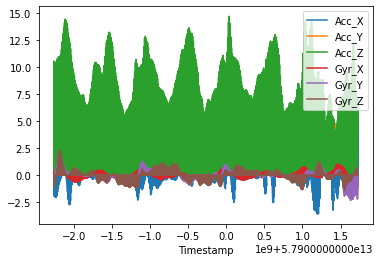

In [ ]:
df_walk.plot(x="Timestamp",y=dataset_columns[1:-1])
round(np.mean(df_walk["Acc_X"]),2)

In [ ]:
data = pd.DataFrame(columns=dataset_columns)

for name in list_of_files:
    data = pd.concat([data,pd.read_csv(name)[dataset_columns]],ignore_index=True)


In [ ]:
data.shape

(12576, 8)

In [ ]:
data.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,Activity
0,57813769498962,-1.580173,1.790863,13.895947,0.000000,0.000000,0.000000,2.0
1,57813769498962,0.005463,0.026791,0.044070,0.005463,0.026791,0.044070,2.0
2,57813969502087,-0.076614,1.886631,7.718906,0.000000,0.000000,0.000000,2.0
3,57813969502087,0.003229,0.018919,0.031852,0.003229,0.018919,0.031852,2.0
4,57814169505212,0.584185,3.016694,11.195287,0.000000,0.000000,0.000000,2.0


In [ ]:
data = data.dropna()
data = data.reset_index()
data.shape

(12574, 9)

In [ ]:
data.to_csv("data_concate.csv")

In [ ]:
data = data[dataset_columns[1:]]
nbr_class = 3 #0
data.head()

,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,Activity
0,-1.580173,1.790863,13.895947,0.000000,0.000000,0.000000,2.0
1,0.005463,0.026791,0.044070,0.005463,0.026791,0.044070,2.0
2,-0.076614,1.886631,7.718906,0.000000,0.000000,0.000000,2.0
3,0.003229,0.018919,0.031852,0.003229,0.018919,0.031852,2.0
4,0.584185,3.016694,11.195287,0.000000,0.000000,0.000000,2.0


In [ ]:
x_ = data.to_numpy()
x_train_raw = x_[:int(x_.shape[0]*0.8)]
x_test_raw = x_[int(x_.shape[0]*0.8):]

"""
scaler = StandardScaler()
x_data = data[["Acc_X","Acc_Y","Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]]
x_scaled = scaler.fit(x_data)
x_scaled = scaler.transform(x_data)

x_train_scaled = x_scaled[:int(x_scaled.shape[0]*0.8)]
x_test_scaled = x_scaled[int(x_scaled.shape[0]*0.8):]
"""

'\nscaler = StandardScaler()\nx_data = data[["Acc_X","Acc_Y","Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]]\nx_scaled = scaler.fit(x_data)\nx_scaled = scaler.transform(x_data)\n\nx_train_scaled = x_scaled[:int(x_scaled.shape[0]*0.8)]\nx_test_scaled = x_scaled[int(x_scaled.shape[0]*0.8):]\n'

In [ ]:
x_train_scaled.shape[0] + x_test_scaled.shape[0]

6287

In [ ]:
x_train = []
y_train = []

n_future = 2
n_past = 10

for i in range(n_past,len(x_train_raw)-n_future+1):
    x_train.append(x_train_raw[i-n_past:i,0:x_train_raw.shape[1]-1])
    y_value = np.zeros((nbr_class))
    y_value[int(data["Activity"][i])]=1
    y_train.append(y_value)
    
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train.shape,y_train.shape,y_train[0]

((10048, 10, 6), (10048, 3), array([0., 0., 1.]))

In [ ]:
x_test = []
y_test = []



for i in range(n_past,len(x_test_raw)-n_future+1):
    x_test.append(x_test_raw[i-n_past:i,0:x_test_raw.shape[1]-1])
    y_value = np.zeros((nbr_class))
    y_value[int(data["Activity"][int(x_test_raw.shape[0]*0.8)+i])]=1
    y_test.append(y_value)
    
x_test = np.array(x_test)
y_test = np.array(y_test)

x_test.shape,y_test.shape,y_test[0]

((2504, 10, 6), (2504, 3), array([0., 0., 1.]))

In [ ]:
def lstm_model():
    
    inputs = layers.Input(shape=(x_train.shape[1],x_train.shape[2]), name="input")
    lstm_1 = layers.LSTM(64, activation="relu",return_sequences=True,name="lstm_layer_1")(inputs)
    lstm_2 = layers.LSTM(32, activation="relu",return_sequences=False,name="lstm_layer_2")(lstm_1)
    dropout = layers.Dropout(0.2)(lstm_2)
    output = layers.Dense(nbr_class,activation="softmax")(dropout)
    
    model = Model(inputs,output)
    
    return model

In [ ]:
my_model = lstm_model()
my_model.compile(optimizer="adam",loss="mse")
my_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 10, 6)]           0         
                                                                 
 lstm_layer_1 (LSTM)         (None, 10, 64)            18176     
                                                                 
 lstm_layer_2 (LSTM)         (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 30,691
Trainable params: 30,691
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = my_model.fit(x_train,y_train,epochs=10,batch_size=64,
                       validation_split=0.1,
                       verbose=1)

Epoch 1/10
142/142 [==============================] - 8s 23ms/step - loss: 0.0492 - val_loss: 0.0145
Epoch 2/10
142/142 [==============================] - 3s 23ms/step - loss: 0.0312 - val_loss: 0.0124
Epoch 3/10
142/142 [==============================] - 3s 22ms/step - loss: 0.0273 - val_loss: 0.0092
Epoch 4/10
142/142 [==============================] - 3s 19ms/step - loss: 0.0239 - val_loss: 0.0073
Epoch 5/10
142/142 [==============================] - 3s 18ms/step - loss: 0.0222 - val_loss: 0.0080
Epoch 6/10
142/142 [==============================] - 3s 19ms/step - loss: 0.0218 - val_loss: 0.0092
Epoch 7/10
142/142 [==============================] - 3s 19ms/step - loss: 0.0208 - val_loss: 0.0070
Epoch 8/10
142/142 [==============================] - 3s 19ms/step - loss: 0.0195 - val_loss: 0.0046
Epoch 9/10
142/142 [==============================] - 3s 19ms/step - loss: 0.0181 - val_loss: 0.0051
Epoch 10/10
142/142 [==============================] - 3s 18ms/step - loss: 0.0165 - val_lo

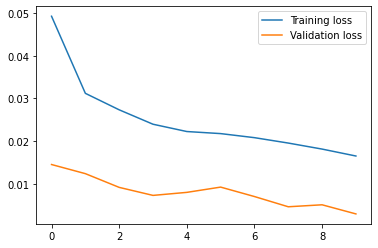

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
acc = 0

for i in range(n_future-1,int(len(y_train))):
    prediction = my_model.predict(x_train[i-(n_future-1):i])
    if np.argmax(y_train[i]) == np.argmax(prediction):
        acc += 1/(len(x_train))
    print("label: {} - result {} - accuracy - {}".format(np.argmax(y_train[i]),np.argmax(prediction),round(acc,2)),end="\r")
print("accuracy = {}%                              ".format(round(acc*100)))

In [ ]:
save_dir = 'saved_model/model_activity_prediction'
my_model.save(save_dir)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(my_model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,tf.lite.OpsSet.SELECT_TF_OPS]

tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
!ls